# Exploratory Data Analysis
## (Master Data)
## 

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load master data

In [2]:
file_path = r'..\data\Master_data\PBJ_Daily_Nurse_Staffing_Q2_2024.csv'
df = pd.read_csv(
    file_path,
    encoding='cp1252',
    low_memory=False)
display(df.shape)
display(df.columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
display(df.head())

(1325324, 33)

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,11.13,0.0,12.08,12.08,0.0,76.29,76.29,0.0,0.0,0.0,0.0,5.46,5.46,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240404,52,12.27,12.27,0.0,17.53,17.53,0.0,54.13,54.13,0.0,0.0,0.0,0.0,20.18,20.18,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240405,52,4.95,4.95,0.0,17.42,17.42,0.0,53.63,53.63,0.0,0.0,0.0,0.0,27.85,27.85,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statistics

In [3]:
print(f"This dataset contains information reagarding quarter of {df['CY_Qtr'].unique()}")
print(f"There are {df['PROVNAME'].nunique()} providers in the dataset")
print(f"There are {df['CITY'].nunique()} cities in the dataset")
print(f"There are {df['STATE'].nunique()} states in the dataset")
print(f"There are {df['COUNTY_NAME'].nunique()} counties in the dataset")
print(f"There are {df['MDScensus'].nunique()} MD-Scensus in the dataset")
print(f"There are {df['WorkDate'].nunique()} different work dates in the dataset "
      f"starting from {df['WorkDate'].unique().min()} until {df['WorkDate'].unique().max()}")

This dataset contains information reagarding quarter of ['2024Q2']
There are 14378 providers in the dataset
There are 5086 cities in the dataset
There are 52 states in the dataset
There are 1672 counties in the dataset
There are 631 MD-Scensus in the dataset
There are 91 different work dates in the dataset starting from 20240401 until 20240630


### Histogram plot

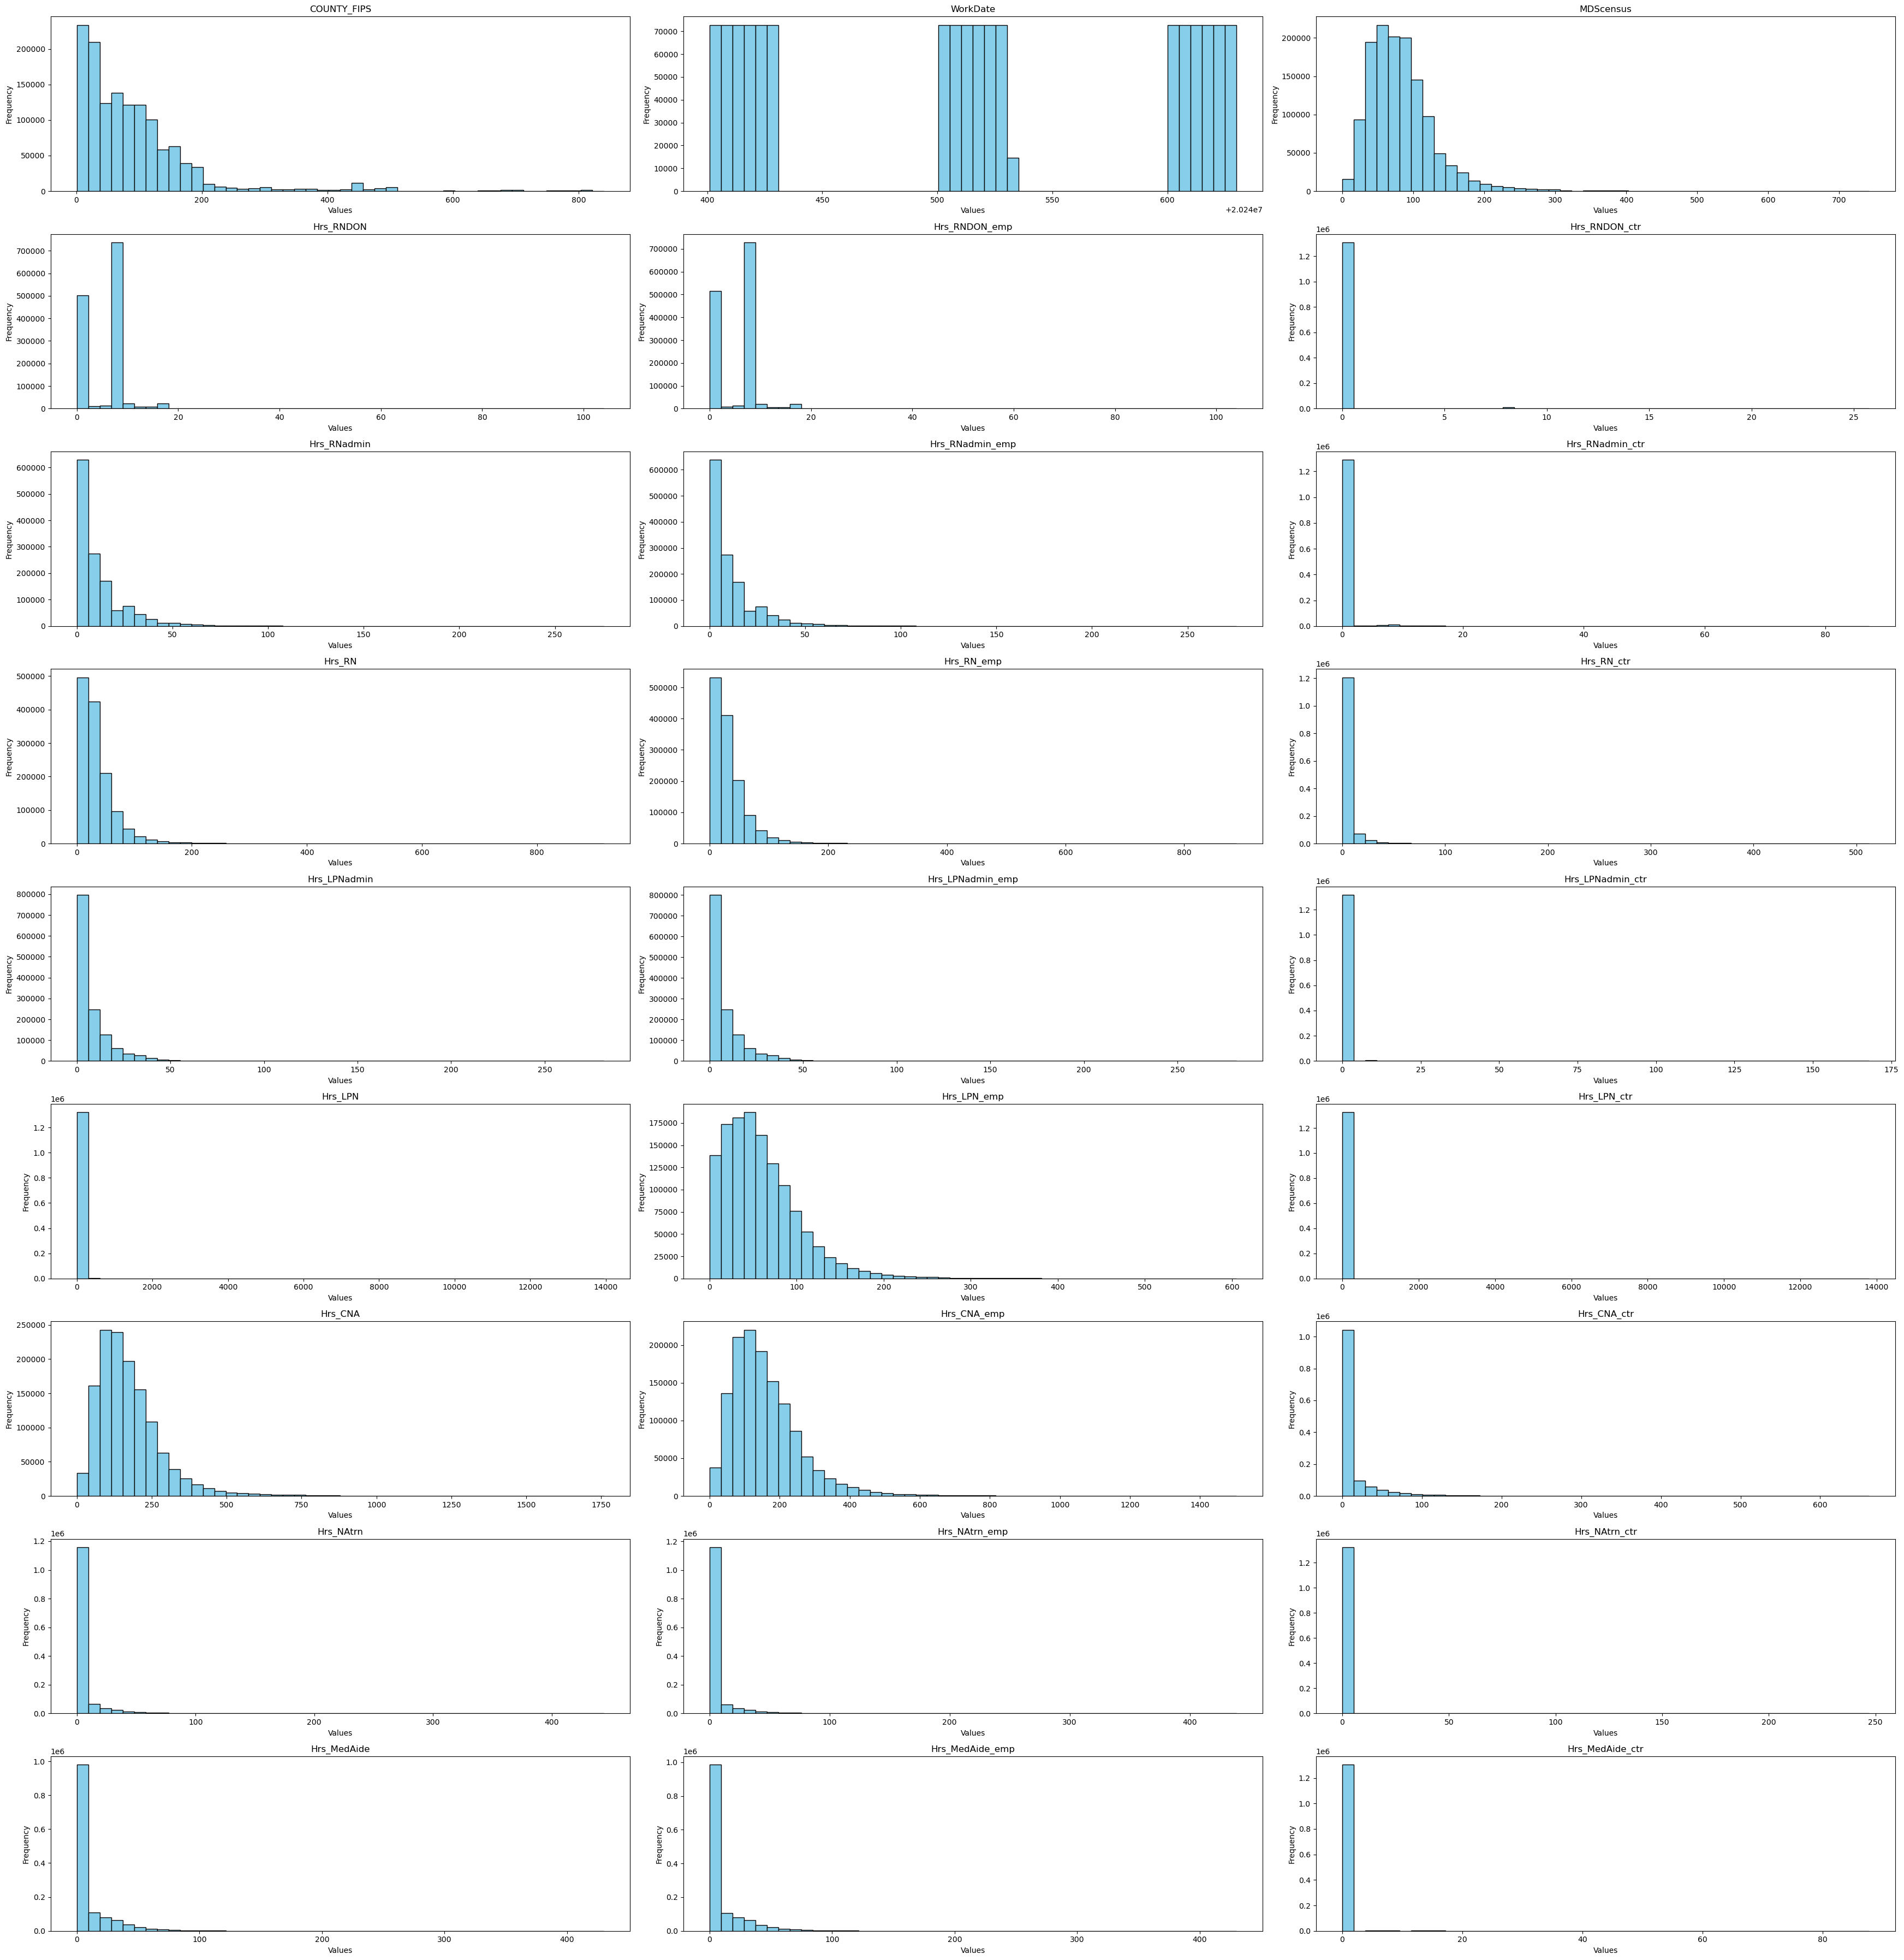

In [4]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, n_rows*4))

for ax, col in zip(axes.flatten(), numeric_cols):
    ax.hist(df[col], bins=46, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for ax in axes.flatten()[len(numeric_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('../Report/master_data_columns.png', dpi=300)
plt.show()

### Histogram Single plot

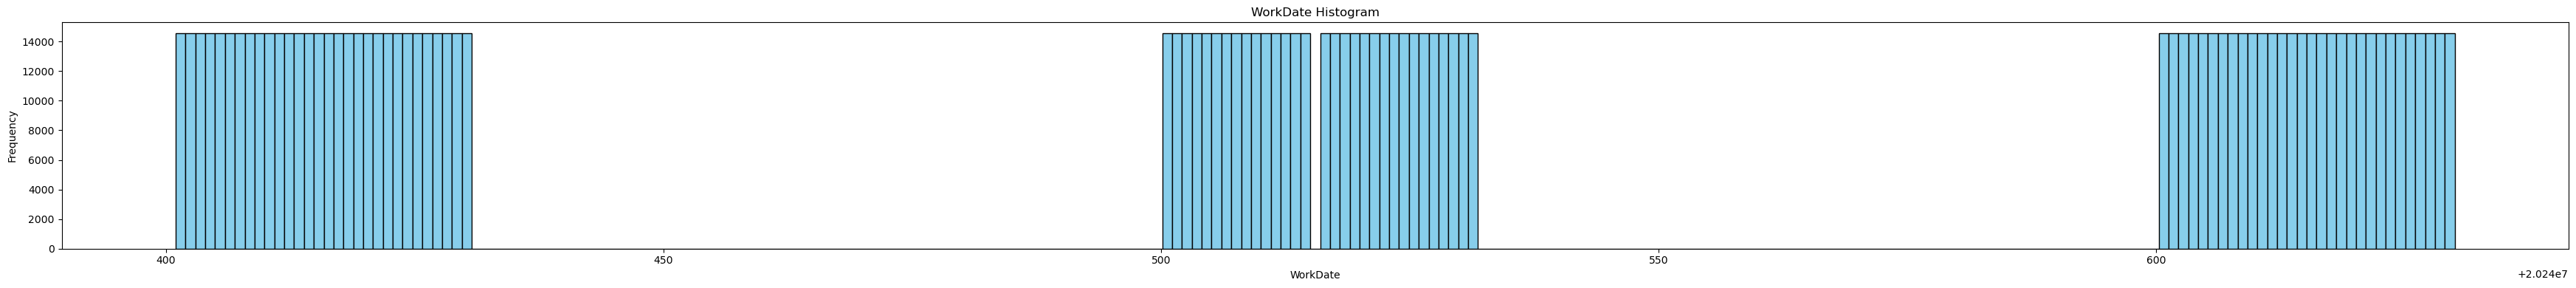

In [5]:
# Select the subset of rows
df_subset = df.loc[:, 'WorkDate']

# Create figure
fig, ax = plt.subplots(figsize=(35, 4))

# Plot histogram
ax.hist(df_subset, bins=231, color='skyblue', edgecolor='black')
ax.set_title('WorkDate Histogram')
ax.set_xlabel('WorkDate')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('../Report/master_data_WorkDate.png', dpi=300)
plt.show()

### Duplicates

In [6]:
row_dups = df.duplicated().any()
col_dups = df.columns.duplicated().any()

if not row_dups and not col_dups:
    print("No duplicate rows or columns found")
else:
    if row_dups:
        print("Duplicate rows:")
        print(df[df.duplicated()])

    if col_dups:
        print("Duplicate columns:")
        print(df.columns[df.columns.duplicated()])

No duplicate rows or columns found


### Consider Unique key 

In [7]:
unique_key_dups = df[['PROVNUM', 'WorkDate']].duplicated().any()
unique_key_dups

np.False_

### Missing values

In [8]:
print(f"Is there missing values in the master_dataset?  {df.isna().any().any()}")
display(missing_values_1 := df.isnull().sum())

Is there missing values in the master_dataset?  False


PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

### Outliers

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
text_cols = df.select_dtypes(exclude=np.number).columns

print("Number of numeric columns:", len(numeric_cols))
print("Numeric columns:", numeric_cols.tolist())

print("Number of text columns:", len(text_cols))
print("Text columns:", text_cols.tolist())

Number of numeric columns: 27
Numeric columns: ['COUNTY_FIPS', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr']
Number of text columns: 6
Text columns: ['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'CY_Qtr']


In [10]:
display(df[text_cols].nunique())
display(df[text_cols].isna().sum())


PROVNUM        14564
PROVNAME       14378
CITY            5086
STATE             52
COUNTY_NAME     1672
CY_Qtr             1
dtype: int64

PROVNUM        0
PROVNAME       0
CITY           0
STATE          0
COUNTY_NAME    0
CY_Qtr         0
dtype: int64

In [11]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
)

# Number of outliers per column
outliers.sum()

COUNTY_FIPS          62881
WorkDate                 0
MDScensus            45695
Hrs_RNDON             2881
Hrs_RNDON_emp         2632
Hrs_RNDON_ctr        15330
Hrs_RNadmin          53102
Hrs_RNadmin_emp      50918
Hrs_RNadmin_ctr      37739
Hrs_RN               64542
Hrs_RN_emp           64274
Hrs_RN_ctr          213363
Hrs_LPNadmin        124162
Hrs_LPNadmin_emp    123682
Hrs_LPNadmin_ctr      7913
Hrs_LPN              42389
Hrs_LPN_emp          40090
Hrs_LPN_ctr         244857
Hrs_CNA              49416
Hrs_CNA_emp          46286
Hrs_CNA_ctr         236531
Hrs_NAtrn           249432
Hrs_NAtrn_emp       247499
Hrs_NAtrn_ctr         2824
Hrs_MedAide         157330
Hrs_MedAide_emp     159824
Hrs_MedAide_ctr      21090
dtype: int64